In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data/sample_data.csv')
data.head()

,Gender,Age_less_35,JobRole,Attrition
0,Male,True,Laboratory Technician,0
1,Male,False,Sales Executive,1
2,Male,True,Sales Representative,1
3,Female,False,Healthcare Representative,0
4,Male,True,Sales Executive,0


In [11]:
p = data['Attrition'].value_counts(normalize= True).values

In [18]:
- np.sum(p * np.log2(p))

0.6554120818442417

In [28]:
def entropy(y):
    p = y.value_counts(normalize = True).values
    ent = - np.sum(p * np.log2(p))
    return ent

In [29]:
entropy(data['Attrition'])

0.6554120818442417

In [24]:
categories = data['Gender'].unique()

In [30]:
entropy(data[data['Gender'] == 'Male']['Attrition'])

0.6568540844475503

In [33]:
def calculate_weighted_entropy(feature,y):
    categories = y.unique()

    weighted_entropy = 0.0

    for category in categories:
        y_category = y[category == feature]
        ent_category = entropy(y_category)

        weighted_entropy += (len(y_category)/len(y)) * ent_category

    return weighted_entropy

In [40]:
calculate_weighted_entropy(data['Gender'],data['Attrition'])

0.0

In [36]:
def information_gain(feature,y):
    
    parent_entropy = entropy(y)
    child_entropy = calculate_weighted_entropy(feature,y)

    ig = parent_entropy - child_entropy

    return ig


In [39]:
for f in data.columns[:-1]:
    print(f"Feature ({f}): {information_gain(data[f], data['Attrition']).round(5)}")

Feature (Gender): 0.65541
Feature (Age_less_35): 0.02146
Feature (JobRole): 0.65541


In [42]:
information_gain(data['JobRole'], data['Attrition'])

0.6554120818442417

#### Gini Impurity

In [47]:
def gini(y):
    p = y.value_counts(normalize = True).values
    g = 1 - np.sum(p**2)
    return g

In [48]:
gini(data['Attrition'])

0.28087799999999996

In [53]:
def calculate_weighted_gini(feature,y):
    categories = y.unique()

    weighted_gini = 0.0

    for category in categories:
        y_category = y[category == feature]
        gini_category = gini(y_category)

        weighted_gini += (len(y_category)/len(y)) * gini_category

    return weighted_gini

In [54]:
def information_gain_gini(feature,y):
    
    parent_gini = gini(y)
    child_gini = calculate_weighted_gini(feature,y)

    ig = parent_gini - child_gini

    return ig


In [55]:
for f in data.columns[:-1]:
    print(f"Feature ({f}): {information_gain_gini(data[f], data['Attrition']).round(5)}")

Feature (Gender): 0.28088
Feature (Age_less_35): 0.0084
Feature (JobRole): 0.28088


#### Sklearn - Decsion Tree Implementation

In [57]:
import numpy as np
import pandas as pd

In [59]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [62]:
X_train.shape, X_test.shape

((1102, 36), (368, 36))

In [65]:
y_train.shape, y_test.shape

((1102, 1), (368, 1))

In [66]:
y_train.value_counts()

Target
0         924
1         178
dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE()

X_sm, y_sm  = sm.fit_resample(X_train, y_train)

In [71]:
y_sm.value_counts()

Target
0         924
1         924
dtype: int64

##### Descision Tree Code

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
model = DecisionTreeClassifier(max_depth = 6)

In [105]:
from sklearn.model_selection import cross_validate

In [106]:
cv_results = cross_validate(model, X_sm, y_sm, cv = 5, return_train_score=True)

In [107]:
cv_results

{'fit_time': array([0.03197908, 0.02798104, 0.0459764 , 0.02798581, 0.03098226]),
 'score_time': array([0.00699496, 0.00500059, 0.00399232, 0.00299668, 0.01299262]),
 'test_score': array([0.64054054, 0.87027027, 0.88108108, 0.8699187 , 0.84281843]),
 'train_score': array([0.94113667, 0.8917456 , 0.88227334, 0.88438134, 0.88438134])}

In [108]:
cv_results['train_score'].mean()

0.8967836586363351

In [109]:
cv_results['test_score'].mean()

0.820925803852633

In [110]:
from sklearn.tree import plot_tree

In [112]:
model.fit(X_sm, y_sm)

DecisionTreeClassifier(max_depth=6)

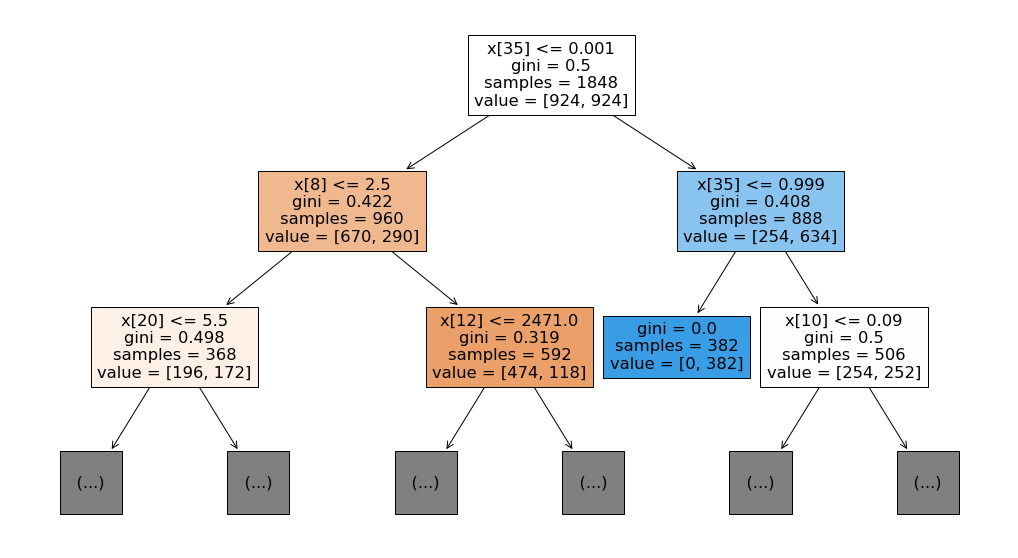

In [117]:
plt.figure(figsize=(18,10))
plot_tree(model, max_depth= 2, filled = True)
plt.show()